En este notebook vamos a ver una breve introducción a los métodos numéricos. Uno de los primeros problemas que nos podemos encontrar en el cómputo científico es el cálculo numérico de **raíces de funciones**, **derivadas numéricas** y **métodos de integración**.

Empezemos por el principio:

# El método de Newton

El método de Newton (también llamado algoritmo de Newton-Raphson) constituye un numérico iterativo para encontrar raíces de una función $f$. 

Requiere a saber la **derivada** $f'$,  pero a cambio suele funcionar mucho mejor. Derivaremos e implementaremos el método en este notebook. Por el momento, supondremos que el usuario provea también la derivada analítica de la función $f$, como otro argumento `df`; posteriormente, veremos cómo calcular derivadas numéricamente.

#### Ejercicio 1 

Considera una función $f: \mathbb{R} \to \mathbb{R}$.
Supón que $x_0$ es una adivinanza inicial de una raíz, y que $x^*$ es la raíz exacta pero 
desconocida. Sigue los siguientes pasos para derivar el método de Newton.

(i) Supón que $x_0$ es suficientemente cercana a $x^*$. Define $\delta$ como la distancia (con signo) de $x^*$ desde $x_0$. 

$$\delta = x^*-x_0 $$

(ii) Escribe la ecuación que corresponde a que $x^*$ sea una raíz de la función, y exprésala en términos de $\delta$. 

Si es raíz debe cumplir

$$f(x^*)=0$$

(iii) Desarrolla esta ecuación en una serie de Taylor a primer orden alrededor de $x_0$, para encontrar un valor aproximado de $\delta$.

$$f(x_0)+f'(x_0)\delta \approx 0$$

$$\delta = -\frac{f(x_0)}{f'(x_0)}$$

Una primera aproximación a la raíz es $x_1 = x_0 +\delta$

$$x_1 = x_0 -  \frac{f(x_0)}{f'(x_0)} $$

(v) Por lo tanto, dada una adivinanza, podemos obtener otra que esperemos esté mejor (más cerca a la raíz). Escribe la misma ecuación que obtuviste en (iv), pero ahora para $x_{n+1}$ en términos de $x_n$. Esto es la regla general para el método de Newton.

Podremos hacer este método ver que la aproximación *n-ésima* nos la podemos usar para encontrar el siguiente término

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

#### Ejercicio 2
(i) Escribe una función que implementa el método de Newton. Puedes suponer que el usuario provea tanto la función `f` como su derivada `df` como argumentos a la función `newton`, así como la condición inicial `x0`. [Posteriormente veremos cómo calcular derivadas con la computadora.] [NB: Si prefieres, puedes utilizar `f′` como nombre de la derivada, al teclear `f\prime<TAB>`. *No* se puede utilizar el apóstrofe aquí.]

In [27]:
function newton(f,f′,x_0,n_pasos)
    x_vieja = x_0
    x_nueva = 100
    for i in 1:n_pasos
        x_nueva = x_vieja - f(x_vieja)/f′(x_nueva)
        if i != n_pasos
            x_vieja = x_nueva
        end
    end
#    @show x_nueva, f(x_nueva)  ### solamente para corroborar 
    return x_nueva, x_vieja
end

newton (generic function with 1 method)

In [16]:
g(x) = (x-1)^5
dg(x) = 5(x-1)^4
x_inicial = 2
pasos = 100
newton(g,dg,x_inicial,pasos)

(x_nueva, f(x_nueva)) = (1.0000000002546297, 1.0703969708083347e-48)


1.0000000002546297

In [20]:
using Interact, Plots
gr()

Plots.GRBackend()

In [22]:
δ = 0.1
A = 1
xs=0:δ:2*pi
[sin(x) for x in xs]

63-element Array{Float64,1}:
  0.0                
  0.09983341664682815
  0.19866933079506122
  0.2955202066613396 
  0.3894183423086505 
  0.479425538604203  
  0.5646424733950355 
  0.6442176872376911 
  0.7173560908995228 
  0.7833269096274834 
  0.8414709848078965 
  0.8912073600614354 
  0.9320390859672264 
  ⋮                  
 -0.9258146823277321 
 -0.8834546557201531 
 -0.8322674422239008 
 -0.7727644875559871 
 -0.7055403255703919 
 -0.6312666378723208 
 -0.5506855425976376 
 -0.4646021794137566 
 -0.373876664830236  
 -0.27941549819892586
 -0.18216250427209502
 -0.0830894028174964 

In [26]:
@manipulate for ω in 0:δ:2*pi, A in 0.1:0.1:1
    plot(xs,[A*sin(ω+x) for x in xs],label="sin(x + $ω)",title="Grafica interactiva",ylim = (-1,1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ω"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>63,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
32, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/mvb/.julia/packages/Interact/Fs3lV/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",\"2.8\",\"2.9\",\"3.0\",\"3.1\",\"3.2\",\"3.3\",\"3.4\",\"3.5\",\"3.6\",\"3.7\",\"3.8\",\"3.9\",\"4.0\",\"4.1\",\"4.2\",\"4.3\",\"4.4\",\"4.5\",\"4.6\",\"4.7\",\"4.8\",\"4.9\",\"5.0\",\"5.1\",\"5.2\",\"5.3\",\"5.4\",\"5.5\",\"5.6\",\"5.7\",\"5.8\",\"5.9\",\"6.0\",\"6.1\",\"6.2\"],\"changes\":WebIO.getval({\"na

(ii) Para la función $x \mapsto x^2$, dibuja la dinámica del método de Newton, dada una función $f$ y una condición inicial $x_0$. Para hacerlo, dibuja una recta entre cada $(x_n, 0)$ y $(x_n, f(x_n))$, así como entre $(x_{n+1}, f(x_{n+1})$ y $(x_{n+1}, 0)$. Hazlo interactivo con `Interact.jl` (dibujando los primeros $n$ pasos y cambiando $n$). Viendo la figura, interpreta geométricamente lo que está haciendo el método de Newton.

Primeramente graficamos la función original

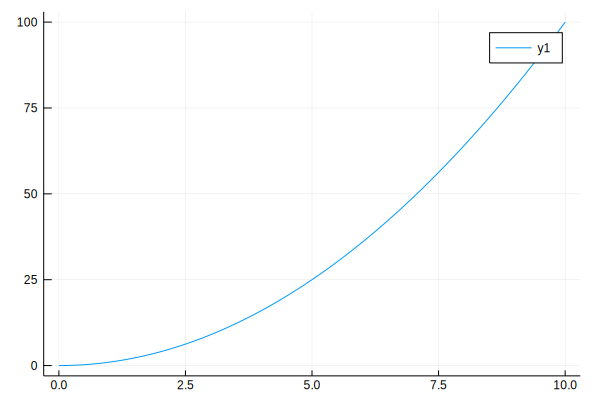

In [31]:
g(x) = x^2
dg(x) = 2x


xs = [i for i in 0:0.1:10]
plot(xs,[g(x) for x in xs])

Usamos `Interact` para manipular la gráfica. Aquí podremos manipular el número de pasos que implementa el método de Newton; el mínimo de pasos es 1 y el máximo `n_pasos`

In [32]:
x_inicial = 10
n_pasos = 20
@manipulate for n in 1:n_pasos
    x_1,x_0 = newton(g,dg,x_inicial,n)
    plot(xs,[g(x) for x in xs],ylim = (0,100))
    plot!([x_0,x_0,x_1,x_1],[0,g(x_0),0,g(x_1)], m=:circle, lab="x_{n+1} = $x_1, x_n = $x_0")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/mvb/.julia/packages/Interact/Fs3lV/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12021689700405222950\",\"id\":\"ob_55\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"12021689700405222950\",\"id\":\"ob_54\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] =

Probaremos el método para otra función.

In [41]:
xs = -5:0.1:5
g(x) = sin(x)
dg(x) = cos(x)
x_inicial = pi/2
pasos = 100
@manipulate for n in 1:n_pasos
    x_1,x_0 = newton(g,dg,x_inicial,n)
    plot(xs,[g(x) for x in xs],ylim = (-1,1))
    plot!([x_0,x_0,x_1,x_1],[0,g(x_0),0,g(x_1)], m=:circle, lab="x_{n+1} = $x_1, x_n = $x_0")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/mvb/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/home/mvb/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/home/mvb/.julia/packages/Interact/Fs3lV/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"7113765785578814227\",\"id\":\"ob_127\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"7113765785578814227\",\"id\":\"ob_126\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] =

El entorno `@manipulate` de la librería `Interact` nos **permite visualizar el método de Newton**.